<center><h1>QBUS6840 - Predictive Analytics </h1></center>

# Tutorial 10 – Seasonal ARIMA models
 
### Objectives:

- Analyze Seasonal ARIMA (SARIMA) models

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="docs.png"> <h3 style="padding-top: 0px;">Documentation -  Seasonal ARIMA (SARIMA) models </h3></div>

This tutorial follows the procedure outlined at https://www.otexts.org/fpp/8/7 . For more detailed mathematical explanation, please also refer to https://otexts.com/fpp2/seasonal-arima.html

Continue with the previous tutorial document, we will discuss the Seasonal ARIMA model. Seasonal ARIMA models are denoted as Seasonal ARIMA$(p,d,q)(P,D,Q)_m$, where $m$ refers to the number of periods in each season. Since Seasonal ARIMA model is complex to write out directly, we normally use a backshift operator to describe the entire process. For example Seasonal ARIMA $(1,1,1)(1,1,1)_4$ without an intercept term is written as:

$$
(1-\phi_1 B)(1-\Phi_1 B^4)(1-B)(1-B^4)Y_t = (1+\theta_1 B) (1 + \Theta_1 B^4) \varepsilon_t
\tag{1}
$$

The following image shows the meaning of each factor in the above equation.

<img src="SARIMA.JPG" width=500 height=50 />

The model form in (1) is useful in terms of intepratation as the seasonal and non-seasonal components are completely separated. However, normally we need to derive (1) to the corresponding ARIMA representation  when we want to estimate model parameters or derive theoretical properties of the Seasonal ARIMA process. For example, let's first write down the **backshift representation for the SARIMA$(0,0,1)(0,0,1)_{12}$ without an intercept term**, and then derive the corresponding single ARIMA formula:

The non-seasonal MA$(1)$ is 
$$
\theta(B) = (1+\theta_1 B)
\tag{2}
$$

The seasonal MA$(1)$ is 
$$
\Theta(B^{12}) = (1+\Theta_1 B^{12})
\tag{3}
$$

There for the model is

$$
\begin{eqnarray}
Y_t &=& \theta(B) \; \Theta(B^{12})\varepsilon_t \tag{4-a}\\ 
    &=& (1+\theta_1 B) \; (1 + \Theta_1 B^{12}) \varepsilon_t \tag{4-b}\\
    &=& (1 + \theta_1 B + \Theta_1 B^{12} + \theta_1 \Theta_1 B^{13})\varepsilon_t \tag{4-c}\\
    &=& \theta_1 \varepsilon_{t-1} + \Theta_1 \varepsilon_{t-12} + \theta_1 \Theta_1 \varepsilon_{t-13} + \varepsilon_t \tag{4-d}
\end{eqnarray}
$$

which is the model has MA terms at lags $1$, $12$, and $13$. Here, we have transformed the SARIMA model, from the backshift representation (4-b), to the corresponding ARIMA representation (4-d).

## 1.  Observe theoretical ACF  for SARIMA$(0,0,1)(0,0,1)_{12}$

### Step 1: Set parameters for $MA(1)$ and Seasonal $MA(1)$

For example, we set $\theta_1 = 0.7$ for $MA(1)$ and $\Theta_1 = 0.8$ for Seasonal $MA(1)$. Therefore, the weight for $\varepsilon_{t-13}$ is equal to $\theta_1 \Theta_1 = 0.7 \times 0.8 = 0.56$. First. let's import the necessary libraries and define model parameters. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels as sm
import statsmodels.api as smt

# Define coefficients for the MA(13) process
maparams = np.array([0.7,0,0,0,0,0,0,0,0,0,0, 0.8,0.8*0.7])
ma = np.r_[1, maparams]  # add zero-lag
zero_lag = np.array([1]) # zero-lag for the AR component

### Step 2: Define the model and plot the theoretical ACF

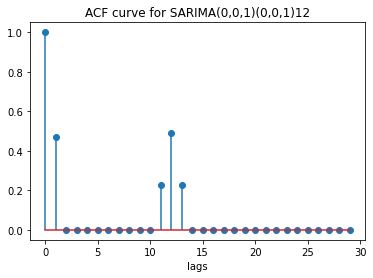

In [2]:
ma_model = sm.tsa.arima_process.ArmaProcess(ar = zero_lag, ma = ma)

# Plot theoretical ACF
plt.figure()
plt.stem(ma_model.acf()[:30],use_line_collection=True)  # Plot until lag 30
plt.title("ACF curve for SARIMA(0,0,1)(0,0,1)12")
plt.xlabel('lags')
plt.show()

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- Observe the ACF plot, how many peaks we have? What are they?

Recall that SARIMA$(0,0,1)(0,0,1)_{12}$ model is equal to MA terms at lags $1$, $12$, and $13$. This leads many to think that the identifying ACF for the model will have non-zero autocorrelations only at lags $1$, $12$, and $13$.

However, from the above ACF plot, we can see $\rho_{11} \neq 0$. Why is this?

The autocorrelation is defined as:

$$
\text{Corr}(Y_t,Y_{t-11}) = \frac{Cov(Y_t,Y_{t-11})}{E[(Y_t-\mu)(Y_t-\mu)]}
$$
with $\mu$ the unconditional mean and

$$
\text{Cov}(Y_t, Y_{t-11}) = E[(Y_t − \mu)(Y_{t-11} − \mu)]
$$

For the Seasonal ARIMA$(0,0,1)(0,0,1)_{12}$ process, we have shown that

$$
Y_t = \theta_1 \varepsilon_{t-1} + \Theta_1 \varepsilon_{t-12} + \theta_1 \Theta_1 \varepsilon_{t-13} + \varepsilon_t
$$

then

$$
Y_{t-11} = \theta_1 \varepsilon_{t-1-11} + \Theta_1 \varepsilon_{t-12-11} + \theta_1 \Theta_1 \varepsilon_{t-13-11} + \varepsilon_{t-11}
$$

so the covariance between $Y_t$ and $Y_{t-11}$ is

$$
\begin{eqnarray}
Cov(y_t, y_{t-11}) &=& E[(\varepsilon_t + \theta_1 \varepsilon_{t-1} + \Theta_1 \varepsilon_{t-12} + \theta_1 \Theta_1 \varepsilon_{t-13} − \mu)(\varepsilon_{t−11} + \theta_1 \varepsilon_{t−1−11} + \Theta_1 \varepsilon_{t−12−11} + \theta_1 \Theta_1 \varepsilon_{t−13−11} − \mu)] \\
    &=& E[(\varepsilon_t + \theta_1 \varepsilon_{t−1} + \Theta_1 \varepsilon_{t−12} + \theta_1 \Theta_1 \varepsilon_{t−13} − \mu)(\varepsilon_{t−11} + \theta_1 \varepsilon_{t−12} + \Theta_1 \varepsilon_{t−23} + \theta_1 \Theta_1 \varepsilon_{t−24} − \mu)]
\end{eqnarray}
$$

Here, $\varepsilon$ are independent errors. The expected value of any product involving $\varepsilon$'s with different subscripts will be $0$. A covariance between $\varepsilon$'s with the same subscripts will be the variance of $\varepsilon$. If you inspect all possible products in the above equation, there will be one product with matching subscripts. They have lag $t-12$. Thus, this expected value (covariance) will be different from $0$. This shows that the lag $11$ autocorrelation will be different from $0$. If you look at the more general problem, you can find that only lags $1$, $11$, $12$, and $13$ have non-zero autocorrelations for the SARIMA$(0, 0, 1)(0, 0, 1)_{12}$ model.

## 2.  Observe theoretical ACF for SARIMA$(1,0,0)(1,0,0)_{12}$

**Backshift representation for the SARIMA$(1,0,0)(1,0,0)_{12}$ without an intercept term:**

The non-seasonal AR$(1)$ is 
$$\phi(B) = (1-\phi_1 B)$$

The seasonal AR$(1)$ is 
$$\Phi(B^{12}) = (1-\Phi_1 B^{12})$$

There for the model is

$$
\begin{eqnarray}
\phi(B) \; \Phi(B^{12}) Y_t &=& \varepsilon_t \\ 
 (1 - \phi_1 B) \; (1 - \Phi_1 B^{12})   Y_t &=&  \varepsilon_t \\
 (1 - \phi_1 B - \Phi_1 B^{12} + \phi_1 \Phi_1 B^{13})Y_t  &=& \varepsilon_t \\
 Y_t - \phi_1 Y_{t-1} - \Phi_1 Y_{t-12} + \phi_1 \Phi_1 Y_{t-13}  &=&  \varepsilon_t
\end{eqnarray}
$$

or

$$
 Y_t = \phi_1 Y_{t-1} + \Phi_1 Y_{t-12} - \phi_1 \Phi_1 Y_{t-13} + \varepsilon_t,
$$

which is the model has AR terms at lags $1$, $12$, and $13$.

### Step 1: Set parameters for AR$(1)$ and Seasonal AR$(1)$

For example, we set $\phi_1 = 0.7$ for AR$(1)$ and $\Phi_1 = 0.8$ for Seasonal AR$(1)$. Therefore, the weight for $Y_{t-13}$ is equal to $\phi_1 \Phi_1 = 0.7 \times 0.8 = 0.56$.

In [3]:
# Define coefficients for the AR(13) process
arparams = np.array([0.7, 0,0,0,0,0,0,0,0,0,0, 0.8,-0.8*0.7])
ar = np.r_[1, -arparams] # add zero-lag and negate

### Step 2: Define the model and plot the theoretical PACF

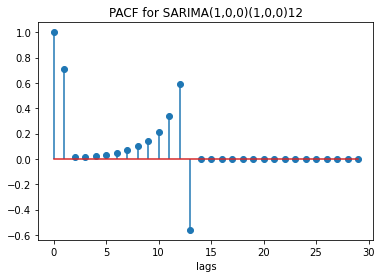

In [4]:
ar_model = sm.tsa.arima_process.ArmaProcess(ar = ar, ma = zero_lag)

# Plot theoretical PACF
plt.figure()
plt.stem(ar_model.pacf()[:30],use_line_collection=True) # Plot until lag 30
plt.title("PACF for SARIMA(1,0,0)(1,0,0)12")
plt.xlabel('lags')
plt.show()

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- Observe the PACF plot, how many peaks we have? What are they?

There are distinct spikes at lags $1$, $12$, and $13$ with a bit of action coming before lag $12$. Then, it cuts off after lag $13$.

## 3. Rules for SARIMA model selection from ACF/PACF plots

These are all ***rule of thumbs***, not an exact science for picking the number of each parameters in SARIMA$(p,d,q)(P,D,Q)_m$. The following rules also apply to ARMA$(p,q)$ and ARIMA$(p,d,q)$ models.

### 1. Identifying the order of differencing

- $d = 0$: if the series has no visible trend or ACF at all lags is low.
- $d \ge 1$: if the series has visible trend or positive ACF values out to a high number of lags.

**Note 1:** if after applying differencing to the series and the ACF at lag $1$ is $-0.5$ or more negative the series may be over-differenced.

**Note 2:** If you find the best d to be $d=1$ then the original series has a constant trend. A model with $d=2$ assumes that the original series has a time-varying trend.

### 2. Identifying the number of AR(p) and MA(q) terms

- $p$ is equal to the last lag where the PACF value is above the significance level.
- $q$ is equal to the last lag where the ACF value is above the significance level.

### 3. Identifying the seasonal part of the model

- $m$ is equal to the ACF lag with the highest value (typically at a high lag).
- $D = 1$ if the series has a stable seasonal pattern over time.
- $D = 0$ if the series has an unstable seasonal pattern over time.
- $P ≥ 1$ if the PACF is positive at lag $m$, else $P = 0$.
- $Q ≥ 1$ if the ACF is negative at lag $m$, else $Q = 0$.

**Note 3:** In most cases, $ d + D \le 2$

**Note 4:** In most cases, $ P + Q \le 2$

## 4. Forecasting with SARIMA

In this tutorial, we will use  SARIMA model to forecast the **AirPassengers** dataset. From the previous tutorials, we've already observed that the AirPassengers data has increasing seasonal variation and hence we apply the log transformation to mitigate this effect. Let's import, apply log transformation and plot the time series (in log scale). 

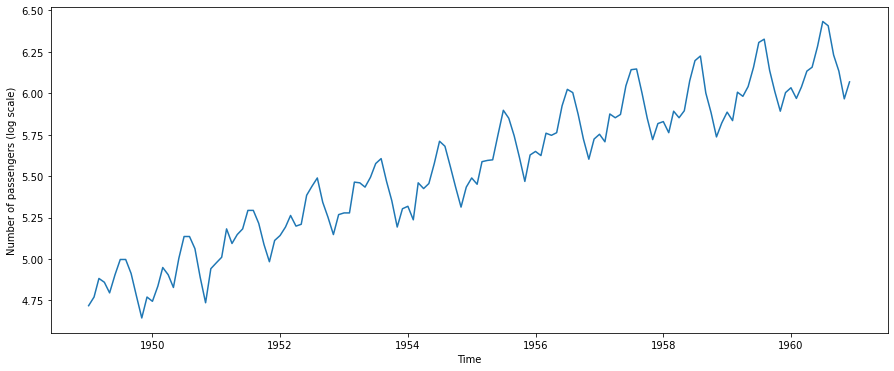

In [5]:
# Then read the data file into a DataFrame object and use the Month column as the index of the DataFrame
data = pd.read_csv('AirPassengers.csv')        # Read data from a csv file
data['Month'] = pd.to_datetime(data['Month'])  # Convert the data in the Month column to datetime
data.set_index('Month', inplace=True)          # Indexing the DataFrame by the Month column

# Apply log transform and plot the new series
ts = data['Passengers']
ts_log = np.log(ts) 

# Plot the log series
plt.figure(figsize = (15,6))
plt.plot(ts.index, ts_log)
plt.xlabel('Time')
plt.ylabel('Number of passengers (log scale)')
plt.show()

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- Observe the sample ACF/PACF plots for `ts_log`, what can we say about the stationarity of the time series? What could be good ARIMA models to model `ts_log`?

It's is quite clear that  `ts_log` is non-stationary, e.g. data exhibits trend and seasonality, sample ACF does not die down quickly, etc. Then the next step is to perform 1-order differencing to `ts_log` and re-examine the sample ACF/PACF of the differenced data. 

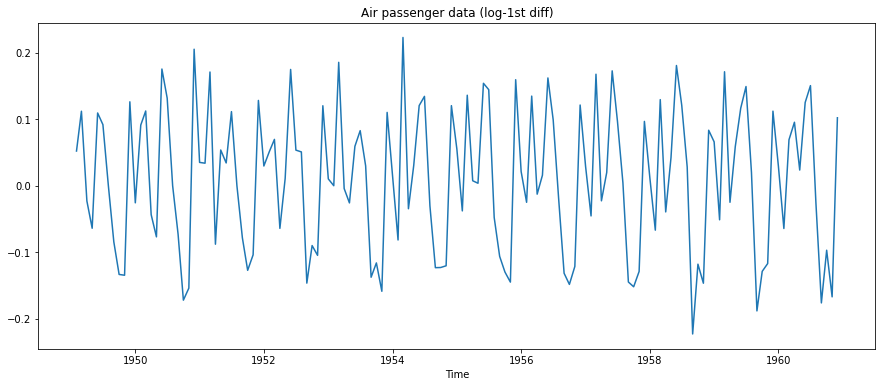

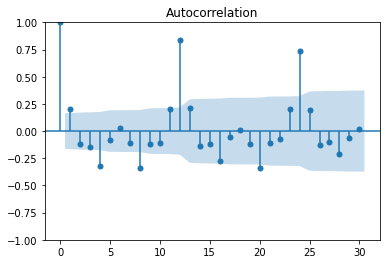

/Users/kevin/.julia/conda/3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


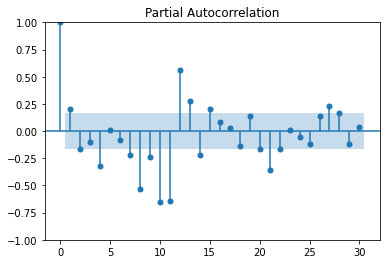

In [6]:
# Take the 1st order diff
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)

# Plot the 1st-differencing series
plt.figure(figsize = (15,6))
plt.plot(ts_log_diff)
plt.title("Air passenger data (log-1st diff)")
plt.xlabel('Time')
plt.show()

# Plot sample ACF/PACF
smt.graphics.tsa.plot_acf(ts_log_diff, lags=30, alpha = 0.05)
plt.show()

smt.graphics.tsa.plot_pacf(ts_log_diff, lags=30, alpha = 0.05)
plt.show()

Looking at the ACF and PACF plots of the differenced series we see our first significant cut off at lag $4$ for ACF and at lag $2$ for the PACF which suggest to use $p = 2$ and $q = 4$.

We also have a big value at lag 12 in the ACF plot which suggests our season is $m = 12$.

Since, PACF at lag $m = 12$ is positive it suggests $P = 1$. Similarly ACF at lag $m=12$ is positive and thus $Q = 0$.

Since this is a differenced series for SARIMA we set $d = 1$, and since the seasonal pattern is not stable over time we set $D = 0$.

All together this suggests us the SARIMA$(2,1,4)(1,0,0)_{12}$ model is a ***reasonable benchmark model***. Next we run SARIMA with these values to fit a model on our training data. We will use the first 11 years of data for training and the last 12 months data as the out-of-sample part.

In [7]:
# Import the SARIMAX class to estimate the SARIMA models
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Extract data for in-sample period (1949-1959)
data_in = ts_log['1949':'1959']
T_in = len(data_in) 

# Extract data for out-of-sample period (1960)
data_out = ts_log['1960']
T_out = len(data_out)


# Define a SARIMAX model
model = SARIMAX(data_in, 
                order = (2,1,4),                 # Non-seasonal component
                seasonal_order = (1,1,0,12),     # Seasonal component
                enforce_stationarity = False,
                enforce_invertibility = False)

# Fit the SARIMAX model on in-sample data
model_fit = model.fit()

# Forecast the number of passengers for the out-of-sample period
forecast = model_fit.forecast(T_out)

/Users/kevin/.julia/conda/3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevin/.julia/conda/3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevin/.julia/conda/3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Finally, we plot the forecasting results. Please note that we have used `np.exp()` to transform the log transformed data to original data.

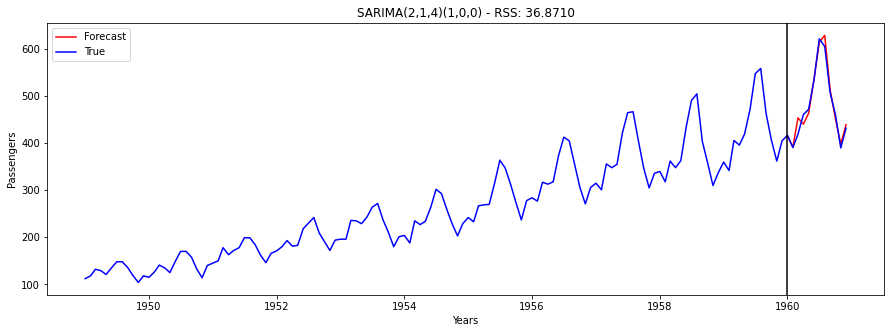

In [8]:
# Plot forecast and true values
plt.figure(figsize=(15,5))
plt.plot(np.exp(forecast),'r',label='Forecast')
plt.plot(np.exp(ts_log),'b',label='True')
plt.title('SARIMA(2,1,4)(1,0,0) - RSS: %.4f'%sum((model_fit.resid.values)**2))
plt.xlabel("Years")
plt.ylabel("Passengers")
plt.legend()
plt.axvline(x=ts_log.index[T_in],color='black')  # Make a vertical line indicating train/test separation
plt.show()

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="docs.png"> <h3 style="padding-top: 0px;">Documentation -  Seasonal ARIMAX </h3></div>

https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

# Task

In tutorial 10, we used Seasonal ARIMA model to forecast air passenger data. We perform train/test split. We selected optimum values of $p$ (order of non-seasonal AR) & $q$ (order of non-seasonal MA) through visualization. One way to select the optimum model is through Akaike Information Criterion (AIC). The best model will give minimum AIC.

1. Please vary the values of $p$ and $q$ from $0$ to $5$ and calculate AIC for the corresponding SARIMA model by fitting the training data. After defining the model, you can use below code to calculate the fit the model and calculate AIC.
```Python
model_fit = model.fit(disp=-1)
model_fit.aic
```
Report the order of $p$ and $q$ with minimum AIC. Use the same values of $P$, $D$, $Q$ and $M$ of tutorial 10.

2. Fit a model with optimum $p$ and $q$ as calculated above. Forecast on test data using this optimum model. Calculate SSE using this optimum model and compare that with the model implemented in tutorial 10.